<a href="https://colab.research.google.com/github/DITHAAAA/PYTN_Assignment1/blob/main/PYTN_Assgn_1_Batch_5_Ditha_Tul_Nugraha.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Visualisasi Data**

##**Importing Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from PIL import Image
import folium

from wordcloud import WordCloud, STOPWORDS

mpl.style.use('ggplot')

%matplotlib inline

print('Matplotlib version:', mpl.__version__)

Matplotlib version: 3.7.1


##**Ingesting Data**

In [ ]:
df = pd.read_csv("london_crime_by_lsoa.csv")
df

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0.0,2016.0,11.0
1,E01001646,Greenwich,Violence Against the Person,Other violence,0.0,2016.0,11.0
2,E01000677,Bromley,Violence Against the Person,Other violence,0.0,2015.0,5.0
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0.0,2016.0,3.0
4,E01004563,Wandsworth,Robbery,Personal Property,0.0,2008.0,6.0
...,...,...,...,...,...,...,...
3760860,E01004503,Wandsworth,Theft and Handling,Handling Stolen Goods,0.0,2015.0,1.0
3760861,E01032565,Lewisham,Other Notifiable Offences,Other Notifiable,0.0,2012.0,1.0
3760862,E01001737,Hackney,Theft and Handling,Theft/Taking of Pedal Cycle,1.0,2015.0,9.0
3760863,E01001127,Croydon,Criminal Damage,Other Criminal Damage,0.0,2010.0,5.0


In [ ]:
df.head()

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0.0,2016.0,11.0
1,E01001646,Greenwich,Violence Against the Person,Other violence,0.0,2016.0,11.0
2,E01000677,Bromley,Violence Against the Person,Other violence,0.0,2015.0,5.0
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0.0,2016.0,3.0
4,E01004563,Wandsworth,Robbery,Personal Property,0.0,2008.0,6.0


In [ ]:
df.shape

(3760865, 7)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3760865 entries, 0 to 3760864
Data columns (total 7 columns):
 #   Column          Dtype  
---  ------          -----  
 0   lsoa_code       object 
 1   borough         object 
 2   major_category  object 
 3   minor_category  object 
 4   value           float64
 5   year            float64
 6   month           float64
dtypes: float64(3), object(4)
memory usage: 200.9+ MB


##**Area Plot**

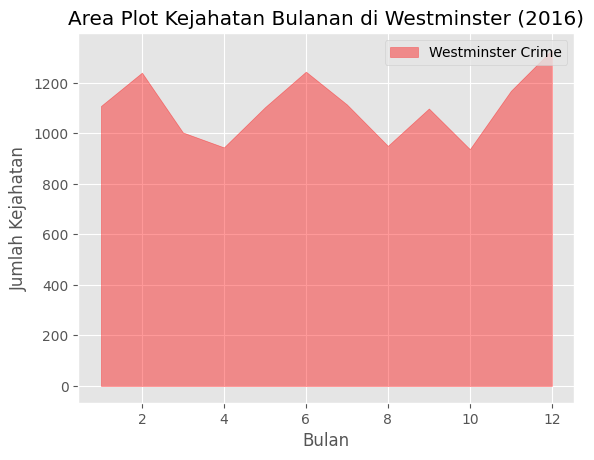

In [ ]:
# Memilih data kejahatan pada tahun 2016 di Westminster menggunakan kondisi dari dataset
westminster_data = df[(df['borough'] == 'Westminster') & (df['year'] == 2016)]

# Mengelompokkan data berdasarkan bulan dan menghitung total kejahatan
monthly_crime = westminster_data.groupby('month')['value'].sum().reset_index()

# Membuat area plot
plt.fill_between(monthly_crime['month'], monthly_crime['value'], color='red', alpha=0.4, label='Westminster Crime')

# Menambahkan judul dan label sumbu
plt.title('Area Plot Kejahatan Bulanan di Westminster (2016)')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Kejahatan')

# Menampilkan legenda
plt.legend()

# Menampilkan plot
plt.show()

##**Histogram**

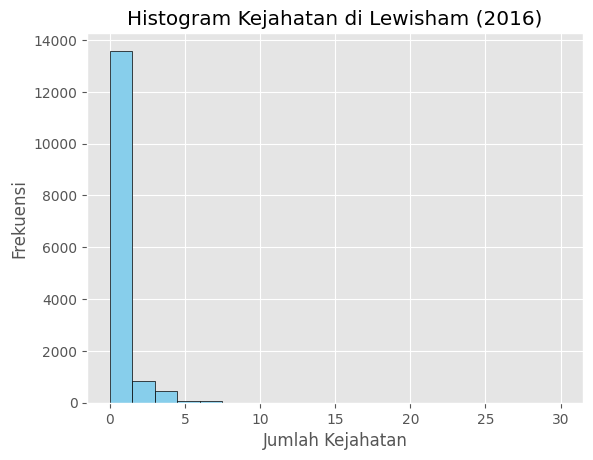

In [ ]:
# Memilih data kejahatan di Lewisham pada tahun 2016 menggunakan kondisi dari dataset
lewisham_data = df[(df['borough'] == 'Lewisham') & (df['year'] == 2016)]

# Mengambil kolom 'value' sebagai data kejahatan
crime_values = lewisham_data['value']

# Membuat histogram
plt.hist(crime_values, bins=20, color='skyblue', edgecolor='black')

# Menambahkan judul dan label sumbu x dan sumbu y untuk memberikan konteks
plt.title('Histogram Kejahatan di Lewisham (2016)')
plt.xlabel('Jumlah Kejahatan')
plt.ylabel('Frekuensi')

# Menampilkan plot
plt.show()

Fungsi "hist" digunakan untuk membuat histogram. "bins" menentukan jumlah bin (bars) dalam histogram. Warna batas (edgecolor) dan warna isi (color) histogram dapat diatur sesuai keinginan.

##**Bar Chart**

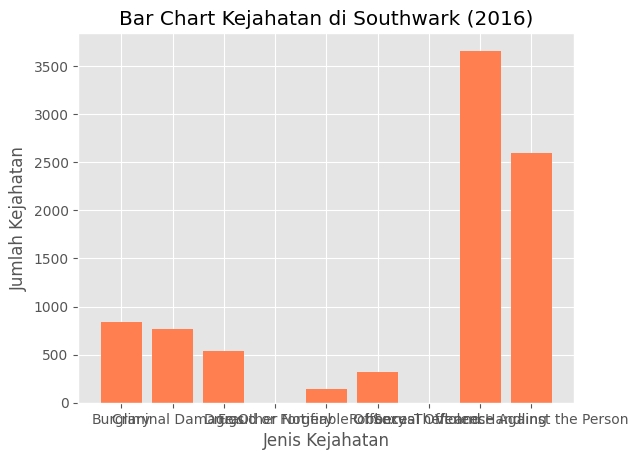

In [ ]:
# Memilih data kejahatan di Southwark pada tahun 2016 menggunakan kondisi dari dataset
southwark_data = df[(df['borough'] == 'Southwark') & (df['year'] == 2016)]

# Mengelompokkan data berdasarkan jenis kejahatan dan menghitung total kejahatan
crime_counts = southwark_data.groupby('major_category')['value'].sum().reset_index()

# Membuat bar chart
plt.bar(crime_counts['major_category'], crime_counts['value'], color='coral')

# Menambahkan judul dan label sumbu x dan sumbu y
plt.title('Bar Chart Kejahatan di Southwark (2016)')
plt.xlabel('Jenis Kejahatan')
plt.ylabel('Jumlah Kejahatan')

# Menampilkan plot
plt.show()

Mengelompokkan data berdasarkan jenis kejahatan (major_category) dan menghitung total kejahatan untuk setiap kategori. Fungsi "bar" digunakan untuk membuat bar chart. Kita menggunakan data kategori kejahatan sebagai sumbu-x dan jumlah kejahatan sebagai sumbu-y. Warna batang dapat diatur sesuai keinginan.

##**Pie Chart**

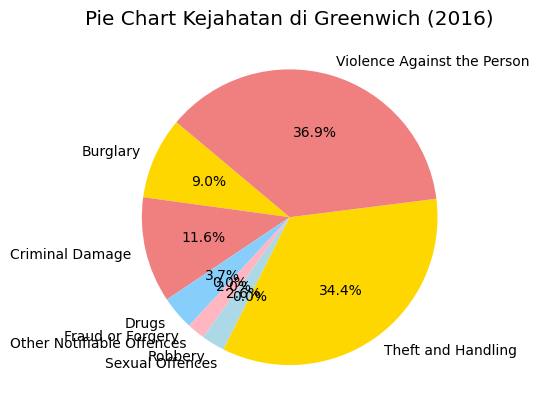

In [ ]:
# Memilih data kejahatan di Greenwich pada tahun 2016 menggunakan kondisi dari dataset
greenwich_data = df[(df['borough'] == 'Greenwich') & (df['year'] == 2016)]

# Mengelompokkan data berdasarkan jenis kejahatan dan menghitung total kejahatan
crime_counts = greenwich_data.groupby('major_category')['value'].sum().reset_index()

# Membuat pie chart
plt.pie(crime_counts['value'], labels=crime_counts['major_category'], autopct='%1.1f%%', startangle=140, colors=['gold', 'lightcoral', 'lightskyblue', 'lightgreen', 'lightpink', 'lightblue', 'lightgrey'])

# Menambahkan judul
plt.title('Pie Chart Kejahatan di Greenwich (2016)')

# Menampilkan plot
plt.show()

Mengelompokkan data berdasarkan jenis kejahatan (major_category) dan menghitung total kejahatan untuk setiap kategori. Fungsi "pie" digunakan untuk membuat pie chart. Data jumlah kejahatan digunakan sebagai data untuk pie chart, dan "labels" digunakan untuk menetapkan label untuk setiap sektor. Parameter lain seperti "autopct", "startangle", dan "colors" digunakan untuk menyesuaikan tampilan pie chart. Dapat menambahkan judul pada plot untuk memberikan konteks.

##**Box Plot**

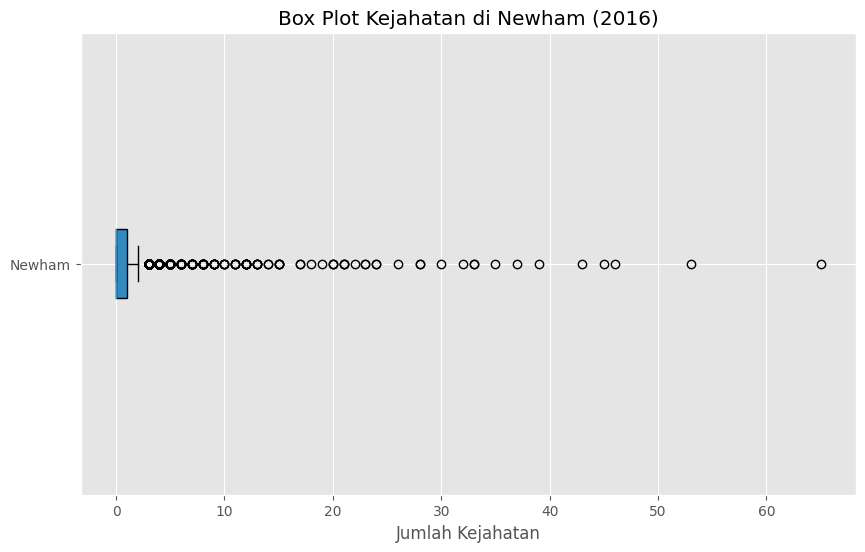

In [ ]:
# Memilih data kejahatan di Newham menggunakan kondisi dari dataset
newham_data = df[(df['borough'] == 'Newham') & (df['year'] == 2016)]

# Membuat box plot
plt.figure(figsize=(10, 6))  # Ukuran figur
plt.boxplot(newham_data['value'], vert=False, patch_artist=True, labels=['Newham'])

# Menambahkan judul dan label sumbu
plt.title('Box Plot Kejahatan di Newham (2016)')
plt.xlabel('Jumlah Kejahatan')

# Menampilkan plot
plt.show()

Membuat box plot menggunakan fungsi "boxplot" dari Matplotlib. "vert=False" mengatur orientasi box plot menjadi horizontal, "patch_artist=True" memberikan warna pada bagian dalam box plot, dan "labels" memberikan label pada sumbu-x. Menambahkan judul pada plot dan label pada sumbu-x untuk memberikan konteks. Box plot memberikan visualisasi yang bagus untuk melihat distribusi, kuartil, dan pencilan dalam data.

##**Scatter Plot**

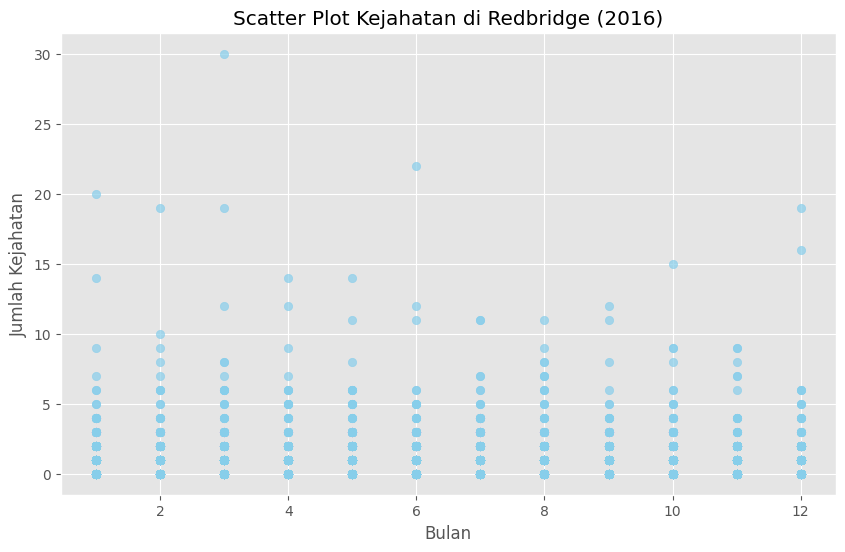

In [ ]:
# Memilih data kejahatan di Redbridge pada tahun 2016 menggunakan kondisi dari dataset
redbridge_data = df[(df['borough'] == 'Redbridge') & (df['year'] == 2016)]

# Membuat scatter plot
plt.figure(figsize=(10, 6))  # Ukuran figur
plt.scatter(redbridge_data['month'], redbridge_data['value'], color='skyblue', alpha=0.7)

# Menambahkan judul dan label sumbu
plt.title('Scatter Plot Kejahatan di Redbridge (2016)')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Kejahatan')

# Menampilkan plot
plt.show()

Membuat scatter plot menggunakan fungsi "scatter" dari Matplotlib. Dalam contoh ini, sumbu-x adalah 'month' (bulan) dan sumbu-y adalah 'value' (jumlah kejahatan). Warna 'skyblue' dan alpha=0.7 memberikan efek transparansi pada titik-titik. Menambahkan judul pada plot dan label pada sumbu-x dan sumbu-y untuk memberikan konteks. Scatter plot berguna untuk mengeksplorasi hubungan antara dua variabel. Scatter plot digunakan untuk menunjukkan distribusi jumlah kejahatan di Westminster pada tahun 2016 berdasarkan bulan.

##**Word Clouds**

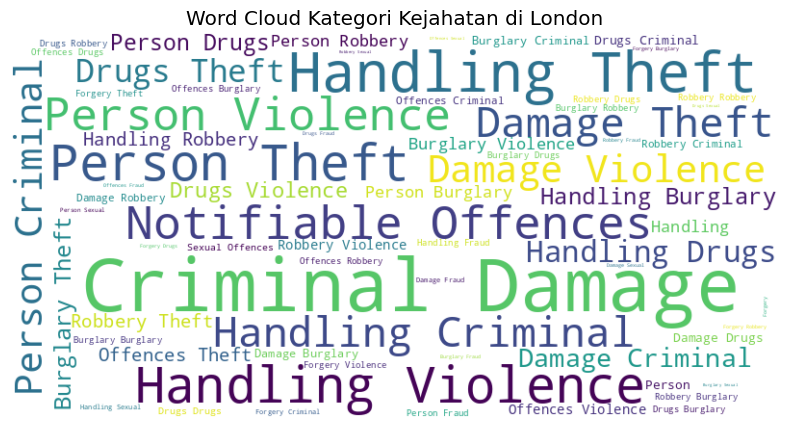

In [ ]:
# Menggabungkan teks dari kolom tertentu menjadi satu teks
text_data = ' '.join(df['major_category'].astype(str))

# Membuat WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)

# Menampilkan WordCloud menggunakan Matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Menghilangkan sumbu
plt.title('Word Cloud Kategori Kejahatan di London')
plt.show()

Membuat objek WordCloud dengan menentukan parameter seperti lebar, tinggi, dan warna latar belakang. Menampilkan WordCloud menggunakan Matplotlib. Fungsi imshow digunakan untuk menampilkan gambar WordCloud, dan axis('off') digunakan untuk menghilangkan sumbu pada plot. Word clouds memberikan visualisasi yang menarik untuk melihat frekuensi relatif dari kata-kata atau kategori tertentu dalam dataset teks. WordCloud digunakan untuk menunjukkan frekuensi relatif kategori kejahatan di London.

##**Folium Maps**

In [ ]:
!pip install folium

In [ ]:
# Memeriksa keberadaan kolom 'latitude' dan 'longitude'
if 'latitude' in westminster_data.columns and 'longitude' in westminster_data.columns:
    # Membuat peta awal dengan pusat di Westminster
    map_center = [51.509865, -0.118092]  # Koordinat tengah Westminster
    london_map = folium.Map(location=map_center, zoom_start=12)

    # Menambahkan mark pada peta untuk setiap kejahatan
    for index, row in westminster_data.iterrows():
        # Memeriksa apakah nilai latitude dan longitude valid
        if pd.notna(row['latitude']) and pd.notna(row['longitude']):
            folium.Marker([row['latitude'], row['longitude']],
                          popup=f"{row['major_category']} ({row['value']} cases)").add_to(london_map)
        else:
            print(f"Data kejahatan tanpa nilai latitude/longitude: {row}")

    # Menampilkan peta
    london_map.save('london_crime_map.html')
else:
    print("Kolom 'latitude' dan 'longitude' tidak ditemukan dalam dataset.")

Kolom 'latitude' dan 'longitude' tidak ditemukan dalam dataset.


Pemeriksaan Nilai Valid:
Saya menambahkan kondisi untuk memeriksa apakah nilai 'latitude' dan 'longitude' valid menggunakan pd.notna(). Hal ini untuk menghindari kesalahan jika ada nilai yang hilang (NaN) atau tidak valid.

Penanganan Kesalahan:
Jika ada data kejahatan tanpa nilai 'latitude' atau 'longitude', program mencetak pesan kesalahan ke konsol.